In [ ]:
# Untuk Pengolahan Kat
import emoji
import re
import nltk
from nltk.corpus import stopwords, words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Untuk pre processing data
from sklearn.model_selection import train_test_split

# Untuk Pemodelan
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import os

In [19]:
df = pd.read_csv(r"C:\NLP\Sentiment_Analysis\Scrapping\playstore\reviews_ovo.csv")

In [20]:
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,aplikasi bukan nya mempermudah . malah memper ...,2025-10-13 18:30:43
1,Pengguna Google,5,Terima kasih atas perhatiannya,2025-10-13 10:28:05
2,Pengguna Google,5,"JANGAN DIGANTI TLG, SAYA NYAMAN PAKE BSI MOBIL...",2025-10-13 09:54:39
3,Pengguna Google,2,"saya mau bayar tiket kapal Ferry, padahal suda...",2025-10-12 21:51:11
4,Pengguna Google,5,"game menyenangkan ,tapi nggk pernah jakpot",2025-10-12 12:52:30
...,...,...,...,...
128654,Pengguna Google,5,Terima kasih BSM sngat memudahkan saya dalam b...,2018-04-19 07:21:36
128655,Pengguna Google,5,"Lebih Praktis, transaksi tinggal scan.. Kereeeen",2018-04-19 07:17:29
128656,Pengguna Google,5,Alhamdulillah.. sukses terus utk BSM..,2018-04-19 06:54:33
128657,Pengguna Google,5,Keren. Bisa buka rek online,2018-04-19 06:53:19


In [21]:
### Proses EDA

In [22]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    1
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    1
Tanggal     0
dtype: int64
0


In [23]:
df.drop_duplicates(inplace=True)
df = df.replace(r'^\s*$', np.nan, regex=True)  # Hapus kolom yang semua nilainya NaN
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,aplikasi bukan nya mempermudah . malah memper ...,2025-10-13 18:30:43
1,Pengguna Google,5,Terima kasih atas perhatiannya,2025-10-13 10:28:05
2,Pengguna Google,5,"JANGAN DIGANTI TLG, SAYA NYAMAN PAKE BSI MOBIL...",2025-10-13 09:54:39
3,Pengguna Google,2,"saya mau bayar tiket kapal Ferry, padahal suda...",2025-10-12 21:51:11
4,Pengguna Google,5,"game menyenangkan ,tapi nggk pernah jakpot",2025-10-12 12:52:30
...,...,...,...,...
128654,Pengguna Google,5,Terima kasih BSM sngat memudahkan saya dalam b...,2018-04-19 07:21:36
128655,Pengguna Google,5,"Lebih Praktis, transaksi tinggal scan.. Kereeeen",2018-04-19 07:17:29
128656,Pengguna Google,5,Alhamdulillah.. sukses terus utk BSM..,2018-04-19 06:54:33
128657,Pengguna Google,5,Keren. Bisa buka rek online,2018-04-19 06:53:19


In [24]:
df.dropna(subset=['Komentar'], inplace=True)
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,aplikasi bukan nya mempermudah . malah memper ...,2025-10-13 18:30:43
1,Pengguna Google,5,Terima kasih atas perhatiannya,2025-10-13 10:28:05
2,Pengguna Google,5,"JANGAN DIGANTI TLG, SAYA NYAMAN PAKE BSI MOBIL...",2025-10-13 09:54:39
3,Pengguna Google,2,"saya mau bayar tiket kapal Ferry, padahal suda...",2025-10-12 21:51:11
4,Pengguna Google,5,"game menyenangkan ,tapi nggk pernah jakpot",2025-10-12 12:52:30
...,...,...,...,...
128654,Pengguna Google,5,Terima kasih BSM sngat memudahkan saya dalam b...,2018-04-19 07:21:36
128655,Pengguna Google,5,"Lebih Praktis, transaksi tinggal scan.. Kereeeen",2018-04-19 07:17:29
128656,Pengguna Google,5,Alhamdulillah.. sukses terus utk BSM..,2018-04-19 06:54:33
128657,Pengguna Google,5,Keren. Bisa buka rek online,2018-04-19 06:53:19


In [25]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
0


Labeling dengan data rating

In [26]:
def map_rating_to_sentiment(rating):
  """Memetakan rating numerik ke label sentimen.
< 
  Args:
    rating: Nilai rating (misalnya, 1-5).

  Returns:
    Label sentimen ("positive", "negative", atau "neutral").
  """
  if rating <3:
    return "negative"
  elif rating == 3:
    return "neutral"
  else:
    return "positive"

# Terapkan fungsi pada kolom 'Rating' dan simpan hasilnya di kolom baru 'Sentiment'
df['Sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

print(df)

                   Nama  Rating  \
0       Pengguna Google       1   
1       Pengguna Google       5   
2       Pengguna Google       5   
3       Pengguna Google       2   
4       Pengguna Google       5   
...                 ...     ...   
128654  Pengguna Google       5   
128655  Pengguna Google       5   
128656  Pengguna Google       5   
128657  Pengguna Google       5   
128658  Pengguna Google       5   

                                                 Komentar  \
0       aplikasi bukan nya mempermudah . malah memper ...   
1                          Terima kasih atas perhatiannya   
2       JANGAN DIGANTI TLG, SAYA NYAMAN PAKE BSI MOBIL...   
3       saya mau bayar tiket kapal Ferry, padahal suda...   
4              game menyenangkan ,tapi nggk pernah jakpot   
...                                                   ...   
128654  Terima kasih BSM sngat memudahkan saya dalam b...   
128655   Lebih Praktis, transaksi tinggal scan.. Kereeeen   
128656             Alhamdulill

In [27]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    87399
negative    35155
neutral      6104
Name: count, dtype: int64


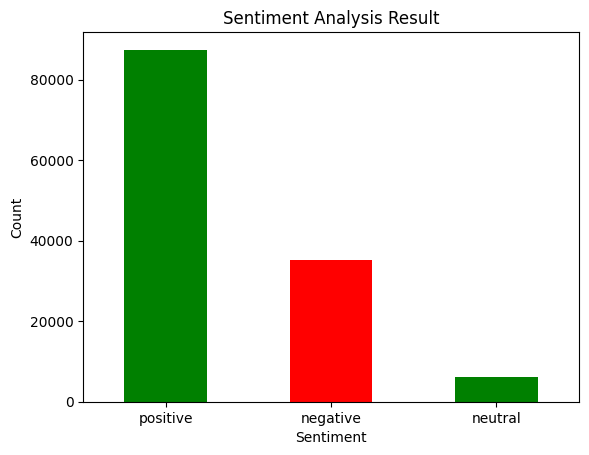

In [28]:
# Plot jumlah sentimen
sentiment_counts.plot(kind="bar", color=["green", "red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Result")
plt.xticks(rotation=0)
plt.show()

In [34]:
nltk.download("punkt_tab")
nltk.download("stopwords")
stopwords_kustom = {
    "aja", "ga", "gk", "gak", "udah", "udh", "ok", "lah", "sih", "banget", "bgt",
    "cuma", "lagi", "tp", "dr", "krn", "dgn", "yg", "tdk", "blm", "sm", "sdh", "mn", 
    "jg", "sy", "sya", "gw", "gue", "nya", "ya"
}
    
def bersihkan_teks(teks):
    if isinstance(teks, str):
        teks = teks.lower()
        teks = re.sub(r'[^\w\s]', '', teks)
        kata_kata = word_tokenize(teks)

        # Ambil stopword dari bahasa Indonesia dan Inggris
        stop_words_ind = set(stopwords.words('indonesian'))
        stop_words_eng = set(stopwords.words('english'))

        # Gabungkan semua stopword
        stop_words = stop_words_ind.union(stop_words_eng).union(stopwords_kustom)

        # Hapus stopword
        kata_kata = [kata for kata in kata_kata if kata not in stop_words]
        return kata_kata
    else:
        return []

df['Kata_Bersih'] = df['Komentar'].apply(bersihkan_teks)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [35]:
df

,Nama,Rating,Komentar,Tanggal,Sentiment,Kata_Bersih
0,Pengguna Google,1,aplikasi bukan nya mempermudah . malah memper ...,2025-10-13 18:30:43,negative,"[aplikasi, mempermudah, memper, sulit, kali, a..."
1,Pengguna Google,5,Terima kasih atas perhatiannya,2025-10-13 10:28:05,positive,"[terima, kasih, perhatiannya]"
2,Pengguna Google,5,"JANGAN DIGANTI TLG, SAYA NYAMAN PAKE BSI MOBIL...",2025-10-13 09:54:39,positive,"[diganti, tlg, nyaman, pake, bsi, mobile, byond]"
3,Pengguna Google,2,"saya mau bayar tiket kapal Ferry, padahal suda...",2025-10-12 21:51:11,negative,"[bayar, tiket, kapal, ferry, bener, tetep, moh..."
4,Pengguna Google,5,"game menyenangkan ,tapi nggk pernah jakpot",2025-10-12 12:52:30,positive,"[game, menyenangkan, nggk, jakpot]"
...,...,...,...,...,...,...
128654,Pengguna Google,5,Terima kasih BSM sngat memudahkan saya dalam b...,2018-04-19 07:21:36,positive,"[terima, kasih, bsm, sngat, memudahkan, bertra..."
128655,Pengguna Google,5,"Lebih Praktis, transaksi tinggal scan.. Kereeeen",2018-04-19 07:17:29,positive,"[praktis, transaksi, tinggal, scan, kereeeen]"
128656,Pengguna Google,5,Alhamdulillah.. sukses terus utk BSM..,2018-04-19 06:54:33,positive,"[alhamdulillah, sukses, utk, bsm]"
128657,Pengguna Google,5,Keren. Bisa buka rek online,2018-04-19 06:53:19,positive,"[keren, buka, rek, online]"


In [36]:
print(df.isna().sum())
print(df.isnull().sum())

Nama           0
Rating         0
Komentar       0
Tanggal        0
Sentiment      0
Kata_Bersih    0
dtype: int64
Nama           0
Rating         0
Komentar       0
Tanggal        0
Sentiment      0
Kata_Bersih    0
dtype: int64


In [37]:
df["Kata_Bersih"] = df["Kata_Bersih"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
print(df.duplicated().sum())

0


In [38]:
# Hitung frekuensi kata untuk setiap sentimen dengan split()
kata_positif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'positive']['Kata_Bersih'] for kata in daftar_kata.split()])
kata_negatif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'negative']['Kata_Bersih'] for kata in daftar_kata.split()])

Visualisasi Kata yang sering muncul

In [39]:
print("\nKata-kata umum dalam sentimen negatif:")
kata_negatif.most_common(50)


Kata-kata umum dalam sentimen negatif:


[('aplikasi', 9481),
 ('bsi', 8906),
 ('bank', 4452),
 ('aktivasi', 4357),
 ('buka', 4126),
 ('mobile', 3551),
 ('tolong', 3294),
 ('susah', 3174),
 ('masuk', 3037),
 ('saldo', 2912),
 ('transaksi', 2832),
 ('gagal', 2831),
 ('update', 2734),
 ('ribet', 2520),
 ('aplikasinya', 2408),
 ('rekening', 2137),
 ('syariah', 2098),
 ('permintaan', 2034),
 ('kehabisan', 1993),
 ('hp', 1919),
 ('verifikasi', 1916),
 ('pulsa', 1902),
 ('dibuka', 1896),
 ('error', 1886),
 ('eror', 1808),
 ('apk', 1803),
 ('kali', 1791),
 ('transfer', 1780),
 ('habis', 1743),
 ('mohon', 1667),
 ('perbaiki', 1497),
 ('pake', 1487),
 ('kode', 1469),
 ('nasabah', 1444),
 ('ulang', 1410),
 ('atm', 1389),
 ('uang', 1335),
 ('pas', 1329),
 ('banking', 1310),
 ('wajah', 1306),
 ('pakai', 1290),
 ('cek', 1230),
 ('login', 1216),
 ('cs', 1207),
 ('gimana', 1199),
 ('bikin', 1198),
 ('bagus', 1171),
 ('gangguan', 1156),
 ('diperbaiki', 1156),
 ('kecewa', 1153)]

In [40]:
print("\nKata-kata umum dalam sentimen positif:")
kata_positif.most_common(50)


Kata-kata umum dalam sentimen positif:


[('bsi', 37751),
 ('aplikasi', 26332),
 ('mudah', 19240),
 ('mobile', 15031),
 ('bagus', 13365),
 ('aplikasinya', 12197),
 ('lengkap', 11395),
 ('keren', 10216),
 ('membantu', 10007),
 ('transaksi', 9165),
 ('fitur', 8628),
 ('mantap', 8516),
 ('nyaman', 7772),
 ('fiturnya', 7339),
 ('good', 6745),
 ('aman', 6574),
 ('alhamdulillah', 6458),
 ('pakai', 5613),
 ('memudahkan', 5585),
 ('cepat', 5354),
 ('job', 5234),
 ('semoga', 4150),
 ('lancar', 4082),
 ('bank', 3976),
 ('deh', 3843),
 ('buka', 3819),
 ('gampang', 3789),
 ('syariah', 3409),
 ('rekening', 3223),
 ('bertransaksi', 3197),
 ('mempermudah', 3099),
 ('pake', 2963),
 ('update', 2960),
 ('apk', 2835),
 ('nih', 2676),
 ('ribet', 2622),
 ('pokoknya', 2619),
 ('mantab', 2462),
 ('bermanfaat', 2213),
 ('terimakasih', 2129),
 ('layanan', 2106),
 ('praktis', 2102),
 ('suka', 1953),
 ('banking', 1947),
 ('transfer', 1837),
 ('top', 1824),
 ('berguna', 1796),
 ('kasih', 1735),
 ('jaya', 1728),
 ('seneng', 1714)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\1882581297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\1882581297.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')


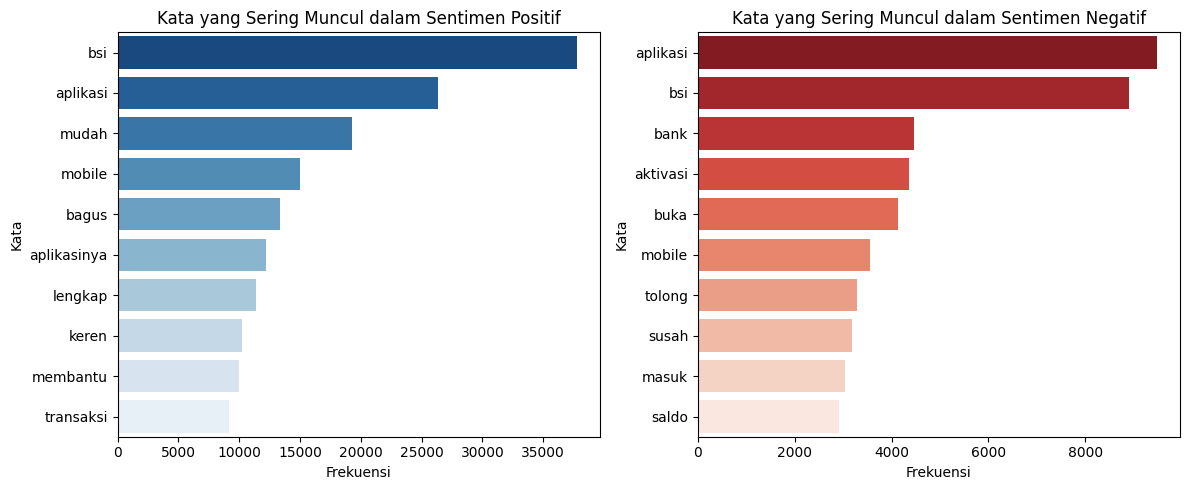

In [41]:
# Konversi ke DataFrame untuk visualisasi
df_positif = pd.DataFrame(kata_positif.most_common(10), columns=['Kata', 'Frekuensi'])
df_negatif = pd.DataFrame(kata_negatif.most_common(10), columns=['Kata', 'Frekuensi'])

# Plot bar chart untuk kata-kata dalam sentimen positif
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Plot bar chart untuk kata-kata dalam sentimen negatif
plt.subplot(1, 2, 2)
sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [42]:
# Ubah kolom Tanggal menjadi format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Mengelompokkan jumlah komentar berdasarkan tanggal
df_grouped = df.groupby(df["Tanggal"].dt.date).size().reset_index(name="Jumlah Komentar")

# Menampilkan tabel hasil
print(df_grouped)

         Tanggal  Jumlah Komentar
0     2018-04-19               33
1     2018-04-20                9
2     2018-04-21                1
3     2018-04-22                1
4     2018-04-23                3
...          ...              ...
2669  2025-10-09                6
2670  2025-10-10                4
2671  2025-10-11                3
2672  2025-10-12                2
2673  2025-10-13                3

[2674 rows x 2 columns]


In [43]:
df['Kata_Bersih'] = df['Kata_Bersih'].astype(str)

# Mengecek jumlah data yang duplikat
df.duplicated().sum()

np.int64(0)

### Ekstraksi Fitur (Feature Engineering)

#### TF-IDF (Term Frequency - Inverse Documents Frequency)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Target label (sentimen)
y = df["Sentiment"].map({"positive": 1, "negative": -1})
y = y.dropna()
df = df.loc[y.index] 

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df["Kata_Bersih"]).toarray()


# Lihat fitur TF-IDF
print(tfidf_vectorizer.get_feature_names_out()[:20])


['10' '100' '14040' '2023' '24' '2x' '3x' '50' '50k' '50rb' 'aamiin'
 'abis' 'account' 'aceh' 'ad' 'admin' 'adzan' 'ah' 'aisyah' 'aj']


In [46]:
import pickle

# Simpan TF-IDF vectorizer
with open("models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

### Modelling Dengan Machine Learning atau Deep Learning

#### Splitting data

In [47]:
from sklearn.model_selection import train_test_split

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
y

0        -1.0
1         1.0
2         1.0
3        -1.0
4         1.0
         ... 
128654    1.0
128655    1.0
128656    1.0
128657    1.0
128658    1.0
Name: Sentiment, Length: 122554, dtype: float64

### Melatih Model Machine Learning

#### Model Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Buat model Naive Bayes
model_nb = MultinomialNB(alpha=5.0)
model_nb.fit(X_train_tf, y_train_tf)

,alpha,5.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Evaluasi model Naive Bayes

In [51]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred = model_nb.predict(X_test_tf)
# Evaluasi performa model
# print("Akurasi Training:", accuracy_score(y_train_tf, ))
print("Akurasi Testing:", accuracy_score(y_test_tf, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred))

Akurasi Testing: 0.9079188935579944
Laporan Klasifikasi:
               precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84      7031
         1.0       0.94      0.93      0.94     17480

    accuracy                           0.91     24511
   macro avg       0.89      0.89      0.89     24511
weighted avg       0.91      0.91      0.91     24511



Confussion Matriks Naive Bayes

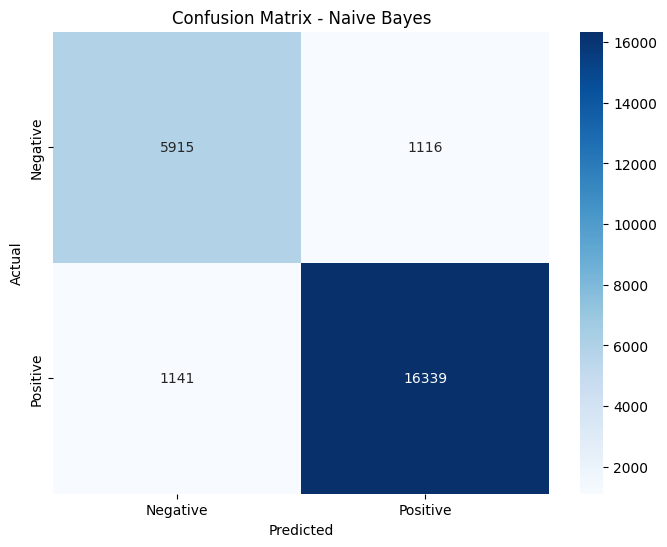

In [52]:
conf_matrix = confusion_matrix(y_test_tf, y_pred)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Testing model Naive Bayes

In [ ]:
komentar_baru = ["Aplikasinya jelek, pelayannanya kurang!", "Saya sangat puas dengan pelayanannya."]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_nb.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")


Komentar: Aplikasinya jelek, pelayannanya kurang! → Sentimen: Negatif
Komentar: aplikasi macam apa ini ,sedikit jelek  → Sentimen: Negatif
Komentar: Saya sangat puas dengan pelayanannya. → Sentimen: Positif


In [59]:
import joblib

# Simpan model ke file
joblib.dump(model_nb, 'models/model_naive_bayes.pkl')

['models/model_naive_bayes.pkl']

#### Model Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500, C=10, solver= "saga", class_weight="balanced")
model_lr.fit(X_train_tf, y_train_tf)
y_pred_lr = model_lr.predict(X_test_tf)

Evaluasi Model Logistic Regression

In [ ]:
# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test_tf, y_pred_lr))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred_lr))

Akurasi: 0.9098832773878548
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     20820
           1       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confussion Matrix Logistic Regression

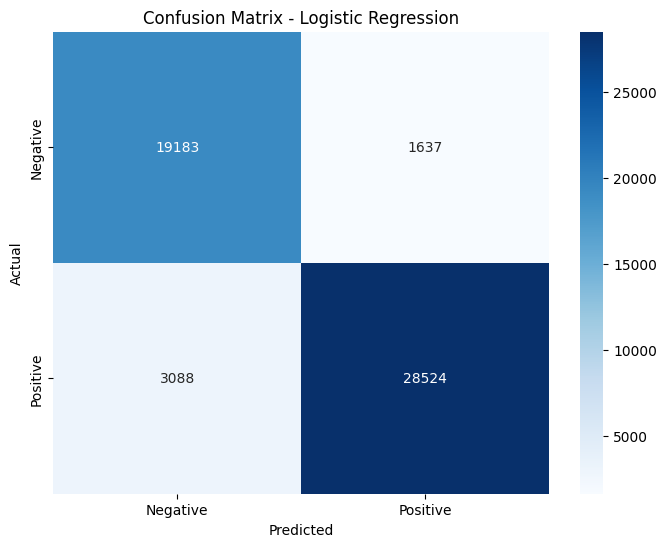

In [ ]:
# Confussion matriks Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_tf, y_pred_lr)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Testing model Logistic Regression

In [ ]:
komentar_baru = ["Uang yang saya transfer telat terkirim", "Cepat banget kalo soal transfer", "aplikasinya bagus cuyy!", "Csnya gak bener sumpah, lama banget pelayanannya"]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_lr.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")

Komentar: Uang yang saya transfer telat terkirim → Sentimen: Negatif
Komentar: Cepat banget kalo soal transfer → Sentimen: Positif
Komentar: aplikasinya bagus cuyy! → Sentimen: Positif
Komentar: Csnya gak bener sumpah, lama banget pelayanannya → Sentimen: Negatif


In [ ]:
# Simpan model ke file
joblib.dump(model_lr, 'models/model_logistic_regression.pkl')

['models/model_logistic_regression.pkl']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# Bagian ini menggunakan model SVM yang sudah dilatih (model_svm)
# ==============================================================================

# 1. Prediksi pada data uji (test data)
y_pred_svm = model_svm.predict(X_test_tf)

# 2. Evaluasi performa model SVM
print("--- Evaluasi Model SVM ---")
print("Akurasi Testing:", accuracy_score(y_test_tf, y_pred_svm))
print("\nLaporan Klasifikasi:\n", classification_report(y_test_tf, y_pred_svm))

# 3. Buat dan Plot Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_tf, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM') # Judul diubah menjadi SVM
plt.show()

# ==============================================================================
# Bagian ini untuk memprediksi sentimen komentar baru menggunakan SVM
# ==============================================================================

# Komentar baru yang ingin diuji
komentar_baru = ["Aplikasinya jelek, pelayannanya kurang!", 
                 "Saya sangat puas dengan pelayanannya.",
                 "Biasa saja, tidak ada yang spesial."]

# Asumsi fungsi bersihkan_teks() dan tfidf_vectorizer sudah ada dari kode sebelumnya
# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi komentar baru ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen menggunakan model SVM
prediksi_svm = model_svm.predict(X_baru)

# Tampilkan hasil prediksi
print("\n--- Prediksi Komentar Baru dengan SVM ---")
for komentar, sentimen in zip(komentar_baru, prediksi_svm):
    # Asumsi: 1 = Positif, 0 = Negatif
    label_sentimen = 'Positif' if sentimen == 1 else 'Negatif'
    print(f"Komentar: \"{komentar}\" → Sentimen: {label_sentimen}")

### Melatih Model dengan Deep Learning

In [25]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [26]:
def create_cnn_lstm_model(input_shape):
    model = models.Sequential()
    
    # CNN Layer
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM Layer
    model.add(layers.LSTM(64))
    
    # Fully Connected Layer
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

cnn_lstm_model = create_cnn_lstm_model((X_train_w2v.shape[1], 1))
cnn_lstm_model.summary()

c:\Users\Sinta\anaconda3\envs\laskarai\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

class StopAtAccuracy(Callback):
    def __init__(self, target_acc=0.95):
        super(StopAtAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("val_accuracy")
        if acc is not None and acc >= self.target_acc:
            print(f"\n✅ Target val_accuracy {self.target_acc*100:.2f}% tercapai, menghentikan training...")
            self.model.stop_training = True

In [33]:
stop_acc_callback = StopAtAccuracy(target_acc=0.95) 

# Latih model
history = cnn_lstm_model.fit(
    X_train_w2v, y_train_w2v,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v),
    callbacks=[lr_scheduler, early_stop, stop_acc_callback],
    verbose=1
    
)

Epoch 1/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 210s 32ms/step - accuracy: 0.9297 - loss: 0.1931 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 2/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 236s 36ms/step - accuracy: 0.9300 - loss: 0.1934 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 3/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 324s 49ms/step - accuracy: 0.9296 - loss: 0.1958 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 4/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 339s 52ms/step - accuracy: 0.9297 - loss: 0.1945 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 5/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 420s 64ms/step - accuracy: 0.9286 - loss: 0.1947 - val_accuracy: 0.9103 - val_loss: 0.2479 - learning_rate: 1.0000e-06
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [39]:
cnn_lstm_model.export("models/cnn_lstm_model_tf_v2")

INFO:tensorflow:Assets written to: models/cnn_lstm_model_tf_v2\assets


INFO:tensorflow:Assets written to: models/cnn_lstm_model_tf_v2\assets


Saved artifact at 'models/cnn_lstm_model_tf_v2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2371044093792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044181088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044404560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044405088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044376640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000031888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000031536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000130720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000130368: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
loss, accuracy = cnn_lstm_model.evaluate(X_test_w2v, y_test_w2v)
print(f"Test Accuracy: {accuracy:.4f}")

1639/1639 [==============================] - 33s 20ms/step - loss: 0.2480 - accuracy: 0.9108
Test Accuracy: 0.9108


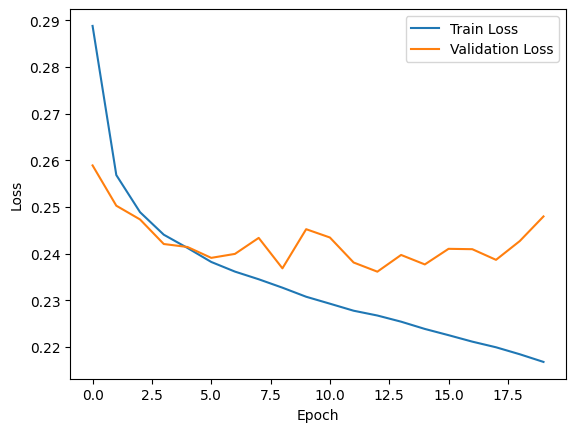

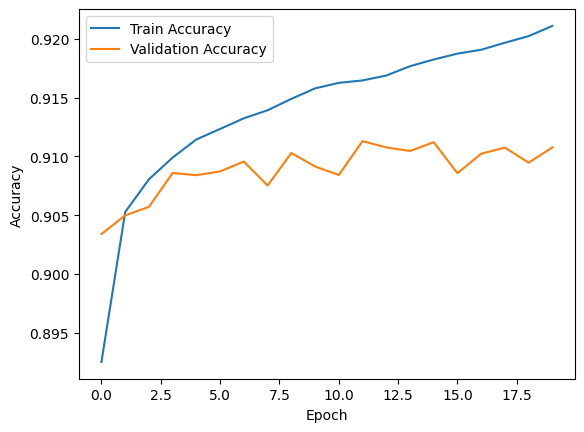

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediksi probabilitas
y_pred_prob = cnn_lstm_model.predict(X_test_w2v)

# Konversi probabilitas ke kelas biner (0 atau 1)
y_pred_cnn_lstm = (y_pred_prob > 0.5).astype(int)

# Classification Report
print("Laporan Klasifikasi:\n", classification_report(y_test_w2v, y_pred_cnn_lstm))

1639/1639 [==============================] - 36s 20ms/step
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     20820
         1.0       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confusion Matrix model CNN dengan LSTM

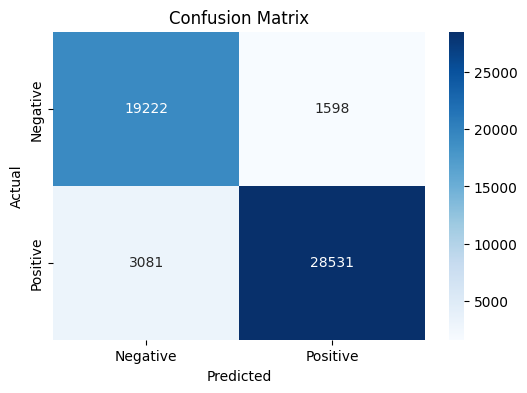

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_w2v, y_pred_cnn_lstm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Testing model CNN dengan LSTM

In [ ]:
new_texts = ["Pelayanan yang sangat baik!", 
             "jelek banget aplikasinya!."]
# Ubah teks menjadi vektor Word2Vec

X_new_w2v = np.array([get_sentence_vector(text, model_w2v) for text in new_texts])

# Prediksi dengan model yang telah dilatih
predictions = cnn_lstm_model.predict(X_new_w2v)

# Konversi hasil sigmoid menjadi label (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    sentiment = "Positif" if label == 1 else "Negatif"
    print(f"Teks: {text} -> Sentimen: {sentiment}")

1/1 [==============================] - 0s 60ms/step
Teks: Pelayanan yang sangat baik! -> Sentimen: Positif
Teks: jelek banget aplikasinya!. -> Sentimen: Negatif


In [ ]:
cnn_lstm_model.save('models/cnn_lstm_model.h5')